In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
pwd


'/content/gdrive/My Drive/Kaggle'

In [ ]:
!kaggle datasets download -d fournierp/captcha-version-2-images

 57% 10.0M/17.4M [00:00<00:00, 103MB/s]
100% 17.4M/17.4M [00:00<00:00, 111MB/s]


In [ ]:
!ls
!unzip \*.zip  && rm *.zip

captcha-version-2-images.zip  discriminator_plot.png  kaggle.json
Archive:  captcha-version-2-images.zip
  inflating: samples/226md.png       
  inflating: samples/22d5n.png       
  inflating: samples/2356g.png       
  inflating: samples/23mdg.png       
  inflating: samples/23n88.png       
  inflating: samples/243mm.png       
  inflating: samples/244e2.png       
  inflating: samples/245y5.png       
  inflating: samples/24f6w.png       
  inflating: samples/24pew.png       
  inflating: samples/25257.png       
  inflating: samples/253dc.png       
  inflating: samples/25egp.png       
  inflating: samples/25m6p.png       
  inflating: samples/25p2m.png       
  inflating: samples/25w53.png       
  inflating: samples/264m5.png       
  inflating: samples/268g2.png       
  inflating: samples/28348.png       
  inflating: samples/28x47.png       
  inflating: samples/2b827.png       
  inflating: samples/2bg48.png       
  inflating: samples/2cegf.png       
  inflating: samples/

In [5]:
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#!pip install Pillow
from PIL import Image
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

from numpy.random import rand
from numpy.random import randint
from numpy import expand_dims
from numpy import ones
from numpy import zeros

In [6]:
#Seed
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

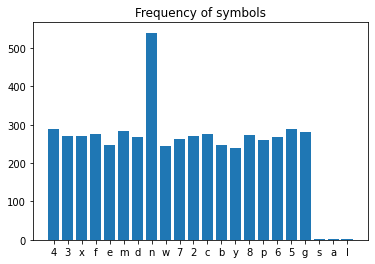

In [7]:
# To calculate Captcha Length, symbols used in captcha and the frequnecy of symbols
data='samples/'
captcha_list=[]
dictionary={}
for captcha in os.listdir(data):
    captcha_list.append(captcha)
    Captcha_split=captcha.split(".")[0]
    for i in Captcha_split:
        dictionary[i]=dictionary.get(i, 0) +1
#Bar graph showing letters and their frequency
plt.bar(*zip(*dictionary.items()))
plt.title('Frequency of symbols')
plt.show()

In [8]:
data_directory=Path("samples/")
symbols=set(list(dictionary.keys()))
print(symbols)
Symbol_length=len(symbols)
characters = sorted(symbols)
# To store the length captcha
captcha_length=[]
# To Store image-label pair info
dataset=[]
# Dataset list
data_list = list(data_directory.glob("*.png"))

for img_path in data_list:
    # 1. To get the label of each image
    label = img_path.name.split(".png")[0]
    # 2. To store the length of each captcha
    captcha_length.append(len(label))
    # 3. Appending image path and label to dataset
    dataset.append((str(img_path), label))

dataset = pd.DataFrame(dataset, columns=["Image_path", "Labels"], index=None)
training_data, testing_data = train_test_split(dataset, train_size=0.9)
# Dropping column names from index 
training_data=training_data.reset_index(drop=True)
testing_data = testing_data.reset_index(drop=True)
# Checking if the columns have been dropped or not
print(training_data.shape)

{'w', 'l', 'm', 'a', '4', 'f', '2', '7', 'y', 'c', '3', '5', 'e', 's', 'x', '6', 'p', 'd', 'g', 'b', 'n', '8'}
(936, 2)


In [9]:

# Map text to numeric labels 
char_to_labels = {char:idx for idx, char in enumerate(symbols)}

# Map numeric labels to text
labels_to_char = {val:key for key, val in char_to_labels.items()}

# Checking for corrupted images
def is_valid_captcha(captcha):
    for ch in captcha:
        if not ch in symbols:
            return False
    return True
num_items = len(dataset)
Image_height=50
Image_width=200
Images = np.zeros((num_items, Image_height, Image_width), dtype=np.float32)
labels = [0]*num_items    
for i in range(num_items):
  img = cv2.imread(dataset["Image_path"][i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (Image_width, Image_height))
  img = (img/255.).astype(np.float32)
  label = dataset["Labels"][i]
  Images[i, :, :] = img
  labels[i] = label
# Training and Testing Data
X_train,X_test=Images[:936],Images[936:]
Y_train,Y_test=labels[:936],labels[936:]

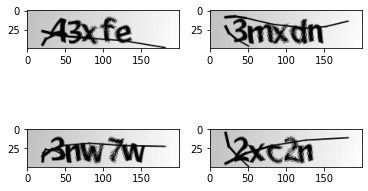

In [10]:
from matplotlib import pyplot
# To display images using Matplotlib
for i in range(4):
	# Product of first two inputs a,b of subplot. Should match the input of range 
	pyplot.subplot(2, 2, 1 + i)
	pyplot.axis('on')
	# Displaying Captcha 
	pyplot.imshow(X_train[i], cmap='gray')
pyplot.show()

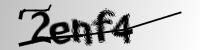

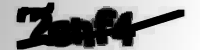

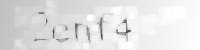

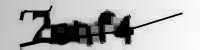

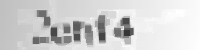

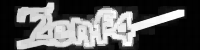

In [11]:
# This implementation is to outline contents of a captcha image
#Morphological Transformation
sample_image = cv2.imread("samples/2enf4.png",0)
from google.colab.patches import cv2_imshow
cv2_imshow(sample_image)
kernel = np.ones((6,6),np.uint8)
erosion = cv2.erode(sample_image,kernel,iterations = 1)
dilation = cv2.dilate(sample_image,kernel,iterations = 1)
opening = cv2.morphologyEx(sample_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(sample_image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(sample_image, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(erosion)
cv2_imshow(dilation)
cv2_imshow(opening)
cv2_imshow(closing)
cv2_imshow(gradient)

In [12]:
#Sequence are a safer way to do multiprocessing.
#This structure guarantees that the network will only
#train once on each sample per epoch which is not the case with generators.
class Generator(keras.utils.Sequence):
    def __init__(self,
                 data,
                 labels,
                 char_map,
                 batch_size=16,
                 img_width=200,
                 img_height=50,
                 downsample_factor=4,
                 max_captcha_length=5,
                 shuffle=True
                ):
        self.data = data
        self.labels = labels
        self.char_map = char_map
        self.batch_size = batch_size
        self.img_width = img_width
        self.img_height = img_height
        self.downsample_factor = downsample_factor
        self.max_length = max_captcha_length
        self.shuffle = shuffle
        self.indices = np.arange(len(data))    
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))
    
    def __getitem__(self, idx):
        curr_batch_idx = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_len = len(curr_batch_idx)
        batch_images = np.ones((batch_len, self.img_width, self.img_height, 1),
                               dtype=np.float32)
        batch_labels = np.ones((batch_len, self.max_length), dtype=np.float32)
        input_length = np.ones((batch_len, 1), dtype=np.int64) * \
                                (self.img_width // self.downsample_factor - 2)
        label_length = np.zeros((batch_len, 1), dtype=np.int64)
        for j, idx in enumerate(curr_batch_idx):
            img = self.data[idx].T
            img = np.expand_dims(img, axis=-1)
            text = self.labels[idx]
            if is_valid_captcha(text):
                label = [self.char_map[ch] for ch in text]
                batch_images[j] = img
                batch_labels[j] = label
                label_length[j] = len(text)
        
        batch_inputs = {
                'input_data': batch_images,
                'input_label': batch_labels,
                'input_length': input_length,
                'label_length': label_length,
                }
        return batch_inputs, np.zeros(batch_len).astype(np.float32)
    def on_epoch_end(self):
      if self.shuffle:
        np.random.shuffle(self.indices)

In [13]:
batch_size = 16
downsample_factor=4
max_captcha_length=5
# To downsample the image and generate batches of training data
# Downsampling will reduce the training times
training_data_generator = Generator(data=X_train,
                                     labels=Y_train,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=Image_width,
                                     img_height=Image_height,
                                     downsample_factor=downsample_factor,
                                     max_captcha_length=max_captcha_length,
                                     shuffle=True
                                    )

# To downsample the image and generate batches of training data 
testing_data_generator = Generator(data=X_test,
                                     labels=Y_test,
                                     char_map=char_to_labels,
                                     batch_size=batch_size,
                                     img_width=Image_width,
                                     img_height=Image_height,
                                     downsample_factor=downsample_factor,
                                     max_captcha_length=max_captcha_length,
                                     shuffle=False
                                    )

In [15]:
# A CTC Layer is used to compute training loss for each prediction       
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred, input_length, label_length):
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        return loss

In [16]:
def build_model():
    # These are input variables for the model. 
    input_img = layers.Input(shape=(Image_width, Image_height, 1),
                            name='input_data',
                            dtype='float32')
    labels = layers.Input(name='input_label', shape=[max_captcha_length], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')
    
    # First CNN layer
    x = layers.Conv2D(32,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv1')(input_img)
    #Max pooling is used to down-sample an image and reduce its dimensionality.A max pool with pool size and strides of 2 is used in this model.
    # Hence, downsampled feature maps are 4x smaller.       
    x = layers.MaxPooling2D((2,2), name='pool1')(x)
    
    # Second CNN Layer
    x = layers.Conv2D(64,
               (3,3),
               activation='relu',
               kernel_initializer='he_normal',
               padding='same',
               name='Conv2')(x)
    x = layers.MaxPooling2D((2,2), name='pool2')(x)
    
    new_shape = ((Image_width // 4), (Image_height // 4)*64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)
    
    # Recurrent Neural Networks
    x = layers.Bidirectional(layers.LSTM(128,
                                         return_sequences=True,
                                         dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64,
                                         return_sequences=True,
                                         dropout=0.25))(x)
    
    # Prediction
    x = layers.Dense(len(symbols)+1,
              activation='softmax', 
              name='dense2',
              kernel_initializer='he_normal')(x)
    
    # To Calculate loss for each prediction on training data or Empirical error
    output = CTCLayer(name='ctc_loss')(labels, x, input_length, label_length)
    
    # Define the model
    model = keras.models.Model(inputs=[input_img,
                                       labels,
                                       input_length,
                                       label_length],
                                outputs=output,
                                name='ocr_model_v1')
    
    # Stochastic Gradient Descent is used as the optimizer
    sgd = keras.optimizers.SGD(learning_rate=0.002,
                               decay=1e-6,
                               momentum=0.9,
                               nesterov=True,
                               clipnorm=5)
    
    # To compile the model and return the metrics below 
    model.compile(optimizer=sgd,metrics=['accuracy'])
    return model

In [17]:
model = build_model()
model.summary()


Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         input_data[0][0]                 
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

In [18]:
# Train the model
history = model.fit(training_data_generator,validation_data=testing_data_generator,epochs=50)

Epoch 1/50
59/59 [==============================] - 32s 405ms/step - loss: 40.1295 - accuracy: 0.0000e+00 - val_loss: 16.8136 - val_accuracy: 0.0000e+00
Epoch 2/50
59/59 [==============================] - 22s 369ms/step - loss: 16.3836 - accuracy: 0.0000e+00 - val_loss: 16.6556 - val_accuracy: 0.0000e+00
Epoch 3/50
59/59 [==============================] - 22s 368ms/step - loss: 16.3946 - accuracy: 0.0000e+00 - val_loss: 16.9969 - val_accuracy: 0.0000e+00
Epoch 4/50
59/59 [==============================] - 22s 370ms/step - loss: 16.3288 - accuracy: 0.0000e+00 - val_loss: 16.7308 - val_accuracy: 0.0000e+00
Epoch 5/50
59/59 [==============================] - 22s 374ms/step - loss: 16.3075 - accuracy: 0.0000e+00 - val_loss: 16.5417 - val_accuracy: 0.0000e+00
Epoch 6/50
59/59 [==============================] - 22s 372ms/step - loss: 16.1264 - accuracy: 0.0000e+00 - val_loss: 16.2827 - val_accuracy: 0.0000e+00
Epoch 7/50
59/59 [==============================] - 22s 369ms/step - loss: 16.1123

In [ ]:
prediction_model = keras.models.Model(model.get_layer(name='input_data').input,
                                        model.get_layer(name='dense2').output)
prediction_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_data (InputLayer)      [(None, 200, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 200, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 25, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 12, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 768)           0         
_________________________________________________________________
dense1 (Dense)               (None, 50, 64)            49216 

In [ ]:
# Converting the predicted values to labels
def decoding_predictions(predictions):
    pred = predictions[:, :-2]
    input_len = np.ones(pred.shape[0])*pred.shape[1]
    results = keras.backend.ctc_decode(pred, 
                                        input_length=input_len,
                                        greedy=True)[0][0]
    output_text = []
    for res in results.numpy():
        outstr = ''
        for c in res:
            if c < len(characters) and c >=0:
                outstr += labels_to_char[c]
        output_text.append(outstr)
    return output_text

In [ ]:

for p, (inp_value, _) in enumerate(testing_data_generator):
  # batchsize can be updated manually or through input generated from generator 
    batchsize=inp_value['input_data'].shape[0]
    test_X = inp_value['input_data']
    labels = inp_value['input_label']
    
    predictions = prediction_model.predict(test_X)
    predicted_texts = decoding_predictions(predictions)
    
    
    true_labels=[]
    for label in labels:
        text = ''.join([labels_to_char[int(x)] for x in label])
        true_labels.append(text)
        
    for i in range(batchsize):
        print(f'True Captcha Label: {true_labels[i]} \t Predicted Captcha Label: {predicted_texts[i]}')
    break

True Captcha Label: yf347 	 Predicted Captcha Label: yf347
True Captcha Label: ygenn 	 Predicted Captcha Label: ygenn
True Captcha Label: x7422 	 Predicted Captcha Label: x7422
True Captcha Label: y2xg4 	 Predicted Captcha Label: y2xg4
True Captcha Label: y33nm 	 Predicted Captcha Label: y33nm
True Captcha Label: y5n6d 	 Predicted Captcha Label: y5n6d
True Captcha Label: y7d75 	 Predicted Captcha Label: y7d75
True Captcha Label: x44n4 	 Predicted Captcha Label: x44n4
True Captcha Label: y53c2 	 Predicted Captcha Label: y53c2
True Captcha Label: y4ec2 	 Predicted Captcha Label: y4ec2
True Captcha Label: xcmbp 	 Predicted Captcha Label: xcmbp
True Captcha Label: xmcym 	 Predicted Captcha Label: xmcym
True Captcha Label: xe8xm 	 Predicted Captcha Label: xe8xm
True Captcha Label: x8e8n 	 Predicted Captcha Label: x8e8n
True Captcha Label: wm47f 	 Predicted Captcha Label: wm47f
True Captcha Label: wce5n 	 Predicted Captcha Label: wce5n
